# Use cases

In [8]:
from imcp import mcp_score, imcp_score, plot_mcp_curve, plot_imcp_curve

import pandas as pd

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import train_test_split

## MCP curve

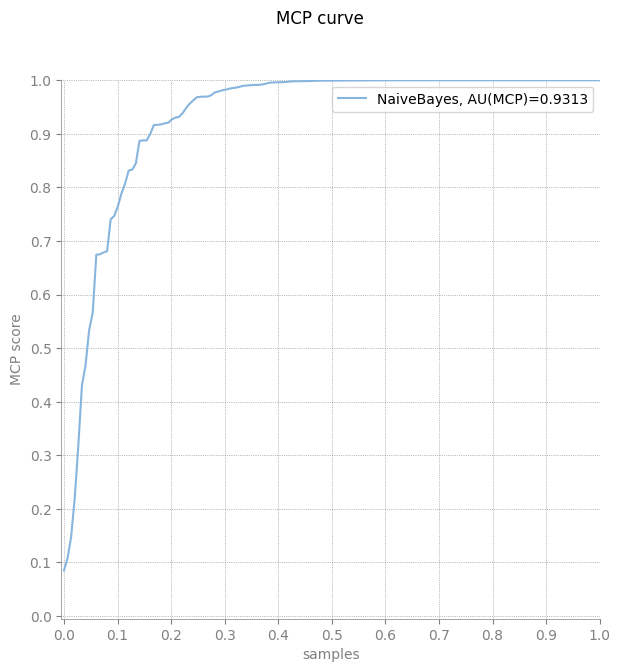

In [9]:
X, y = load_iris(return_X_y=True)
algorithm = {'NaiveBayes': GaussianNB()}

algorithm['NaiveBayes'].fit(X, y)
score = {'NaiveBayes': algorithm['NaiveBayes'].predict_proba(X)}

plot_mcp_curve(y, score)

In [10]:
area = mcp_score(y, score['NaiveBayes'])
print("Area under the MCP curve is equal to {}".format(area))

Area under the MCP curve is equal to 0.9312789283247503


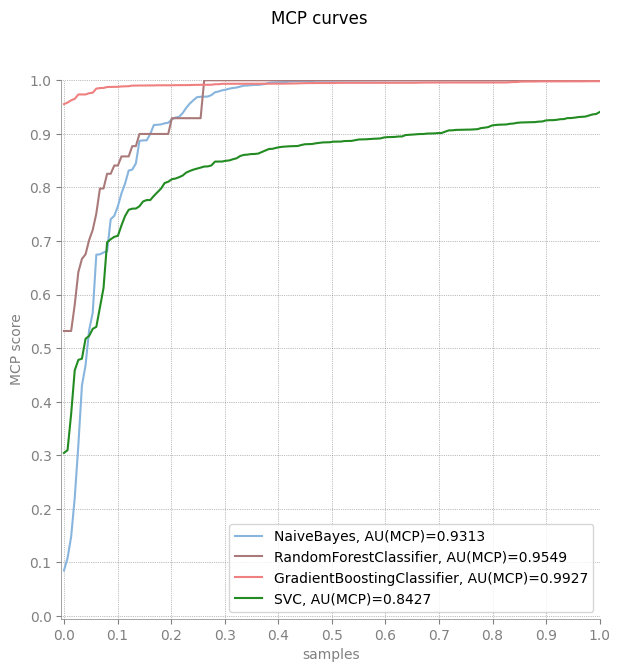

In [11]:
X, y = load_iris(return_X_y=True)
algorithms = {'NaiveBayes': GaussianNB(),
             'RandomForestClassifier': RandomForestClassifier(random_state=42),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}

scores = {}
for key in algorithms:
    algorithms[key].fit(X, y)
    score = algorithms[key].predict_proba(X)
    scores[key] = score

plot_mcp_curve(y, scores)

## IMCP curve

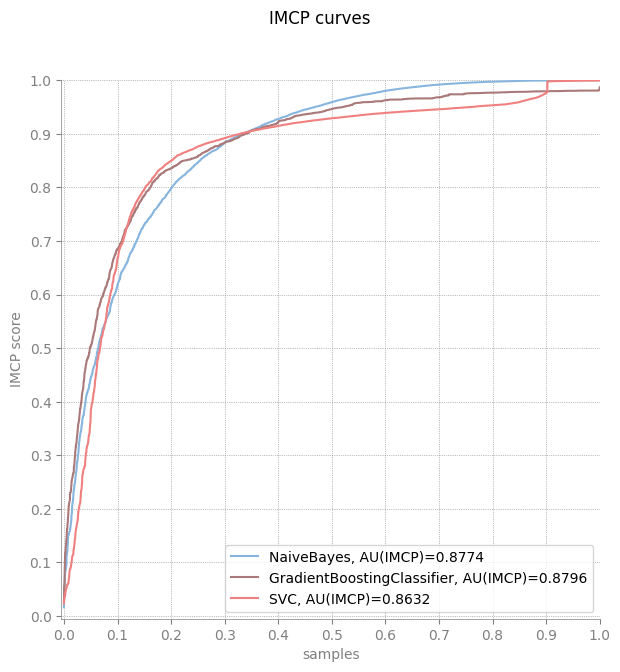

In [12]:
data = pd.read_csv("exp2_1000.csv", sep = "\t")

y = data["class"].to_numpy()
X = data[["X" , "Y"]].to_numpy()

algorithms = {'NaiveBayes': GaussianNB(),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}
scores = {}
for key in algorithms:
    algorithms[key].fit(X, y)
    score = algorithms[key].predict_proba(X)
    scores[key] = score

plot_imcp_curve(y, scores)

## Compare MCP and IMCP scores with other metrics

In [13]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

algorithms = {'NaiveBayes': GaussianNB(),
             'RandomForestClassifier': RandomForestClassifier(random_state=42),
             'GradientBoostingClassifier': GradientBoostingClassifier(),
             'SVC': SVC(probability=True),}

results = pd.DataFrame(index=algorithms.keys(), columns=['mcp', 'imcp', 'macro_precision', 'macro_recall', 'macro_f1'])

for key in algorithms:
    algorithms[key].fit(X_train, y_train)

    score = algorithms[key].predict_proba(X_test)
    results.loc[key, 'mcp'] = mcp_score(y_test, score)
    results.loc[key, 'imcp'] = imcp_score(y_test, score)

    y_pred = algorithms[key].predict(X_test)
    results.loc[key, ['macro_precision', 'macro_recall', 'macro_f1']] = precision_recall_fscore_support(y_test, y_pred, average='macro')[:3]

results

,mcp,imcp,macro_precision,macro_recall,macro_f1
NaiveBayes,0.898374,0.890323,0.915535,0.911111,0.910714
RandomForestClassifier,0.881336,0.873677,0.898148,0.888889,0.887767
GradientBoostingClassifier,0.942036,0.932244,0.934524,0.933333,0.933259
SVC,0.791353,0.787423,0.955556,0.955556,0.955556
